# Boosting
Boosting models are a type of ensemble learning algorithm that combines `multiple weak models` to create a `strong predictive model`. The basic idea behind boosting is to `create a series of models`, each of which is trained on the residuals of the previous model. This process is repeated until a stopping criterion is met.\
Boosting models are `particularly useful` when dealing with `imbalanced datasets`, where one class has a significantly larger
number of instances than the others.

In [1]:
!pip install xgboost -q

In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
# import the data
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
df.shape

(53940, 10)

<Axes: xlabel='carat', ylabel='price'>

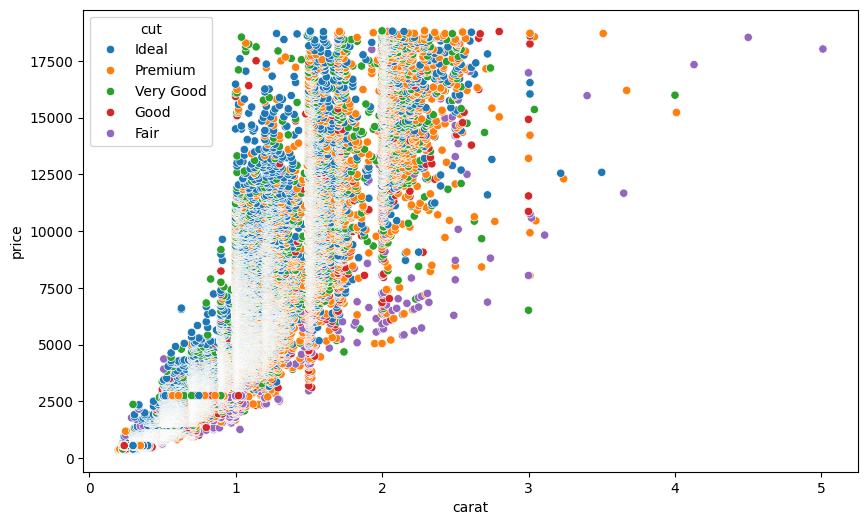

In [38]:
# scatter plot of data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, hue='cut')

In [45]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']
# encode the input variables of diamond data
encoder = LabelEncoder()
X['color'] = encoder.fit_transform(X['color'])
X['clarity'] = encoder.fit_transform(X['clarity'])
# encode target variables
y = encoder.fit_transform(y)

In [47]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
%%time
# train decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# evaluate the model with f string
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7146829810901001
Precision: 0.7159631128248387
Recall: 0.7146829810901001
F1 Score: 0.715261926101477
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       335
           1       0.66      0.70      0.68      1004
           2       0.80      0.79      0.80      4292
           3       0.73      0.73      0.73      2775
           4       0.54      0.55      0.54      2382

    accuracy                           0.71     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.71      0.72     10788

Confusion Matrix: 
[[ 282   38    3    5    7]
 [  31  700   19   30  224]
 [   5   24 3408  339  516]
 [   9   57  325 2018  366]
 [   8  235  482  355 1302]]
CPU times: total: 375 ms
Wall time: 1.69 s


In [49]:
%%time
# train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

# evaluate the model with f string
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7872636262513905
Precision: 0.7809648107352596
Recall: 0.7872636262513905
F1 Score: 0.7809328065653593
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       335
           1       0.79      0.72      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.69      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788

Confusion Matrix: 
[[ 301   20    3    7    4]
 [  20  719   21   38  206]
 [   2   13 3933  165  179]
 [   2   13  302 2259  199]
 [   5  147  500  449 1281]]
CPU times: total: 8.52 s
Wall time: 27.3 s


In [53]:
%%time
# train xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# make predictions
y_pred = xgb.predict(X_test)

# evaluate the model with f string
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.8056173526140156
Precision: 0.8016880797182208
Recall: 0.8056173526140156
F1 Score: 0.8016145716869405
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788

Confusion Matrix: 
[[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]
CPU times: total: 4.77 s
Wall time: 3.75 s


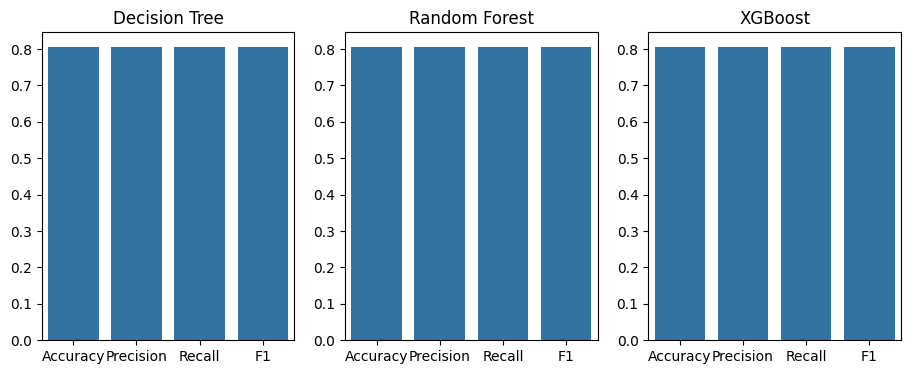

In [52]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()